Import necessary modules

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import Cleversys_Parser_wms as cp
import behavior_miniscope as bm

Point to the path containing your cleversys .txt file

In [3]:
cleversys_txt = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\cleversys\\result\\220831\\220821_mergedVideo_TCR.txt"
print(cleversys_txt)

\\penc8.rc.int.colorado.edu\DonaldsonLab\Sheeran\cleversys\result\220831\220821_mergedVideo_TCR.txt


In [ ]:
#note to self - write fxn into bm to determine whether this is a social file or a non-social (solo) file 
#- maybe include into ms_parse as if statement calling cp.parse() or cp.solo_parse() depending on which is appropriate

Parse cleversys .txt file into frame-by-frame df containing tracked data of interest (can change which columns are included in the ms_parse fxn in timestamp_align.py).

This df will be 1) imported into Bento for alignment with behavioral/neural data (e.g., videos, manual annotations, other sources of data input) and incorporation into a .annot file, and 2) also aligned with neural data in this notebook to generate some more frame-by-frame booleans for input into Bento (and, if you prefer, you can use this df to run all of your analysis outside of Bento)

In [4]:
#will take a bit of time

#choose the appropriate fxn for whether solo animal or not

parsed_cs = bm.ms_parse_solo(cleversys_txt, "cam2") 
#parsed_cs = bm.ms_parse(cleversys_txt, "cam2") #the second argument is the name of the minicam whose video you analyzed in cleversys

print(parsed_cs)

       CenterX(mm)  CenterY(mm)  NoseX(mm)  NoseY(mm)  EventRule1  EventRule2  \
0            561.0        235.0      512.0      214.0           0           0   
1            562.0        234.0      512.0      214.0           0           0   
2            561.0        234.0      512.0      215.0           0           0   
3            561.0        234.0      512.0      215.0           0           0   
4            561.0        235.0      512.0      214.0           0           0   
...            ...          ...        ...        ...         ...         ...   
56335        756.0        270.0      815.0      279.0           0           0   
56336        753.0        273.0      816.0      279.0           0           0   
56337        753.0        272.0      816.0      279.0           0           0   
56338        753.0        272.0      816.0      281.0           0           0   
56339        753.0        272.0      816.0      280.0           0           0   

       EventRule3  EventRul

Import and align all feeds' timestamp files

In [5]:
#point to paths containing timestamp files from each feed
ts_dir = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\miniscope_files\\analyzed\\5001\\2022_08_31-seperate-trials\\11_35_05\\220831_emptychamber1_1"

scope_dir = os.path.join(ts_dir, "My_V4_Miniscope\\timeStamps.csv")
cam1_dir = os.path.join(ts_dir, "MiniCam1\\timeStamps.csv")
cam2_dir = os.path.join(ts_dir, "MiniCam2\\timeStamps.csv")

#load timestamp files
scope_ts = pd.read_csv(scope_dir)
cam1_ts = pd.read_csv(cam1_dir)
cam2_ts = pd.read_csv(cam2_dir)

#align files, using miniscope frames as reference
aligned_ts = bm.align_feeds(scope_dir,
                            cam1_dir,
                           cam2_dir)

print(aligned_ts)

       Frame Number  Time Stamp (ms)  Frame Number_cam1  Frame Number_cam2
0                 0              -31                  0                  0
1                 1               11                  1                  1
2                 2               37                  2                  2
3                 3               70                  3                  4
4                 4              104                  5                  5
...             ...              ...                ...                ...
35883         35883          1204840              56550              56550
35884         35884          1204865              56551              56551
35885         35885          1204900              56553              56553
35886         35886          1204934              56554              56554
35887         35887          1204964              56556              56555

[35888 rows x 4 columns]


Align the timestamps to your parsed cleversys output

In [6]:
cs_ts = bm.align_cleversys(parsed_cs, aligned_ts)
cs_ts

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,EventRule14,EventRule15,EventRule16,Frame Number_cam2,Time,original_time,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1
0,562.0,234.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,182,0.033333,3.033321,1.414214,115,3868,182
1,561.0,234.0,512.0,215.0,0,0,1,0,0,0,...,0,0,0,183,0.050000,3.049988,1.000000,116,3902,183
2,561.0,235.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,185,0.083333,3.083321,1.000000,117,3936,185
3,560.0,236.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,186,0.100000,3.099988,1.414214,118,3967,186
4,559.0,231.0,512.0,214.0,0,0,1,0,0,0,...,0,0,0,188,0.133333,3.133321,6.082763,119,4003,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35745,756.0,270.0,814.0,277.0,0,0,1,0,1,0,...,0,0,0,56513,938.879578,941.879566,0.000000,35860,1204060,56513
35746,756.0,270.0,815.0,276.0,0,0,1,0,1,0,...,0,0,0,56515,938.912911,941.912899,0.000000,35861,1204092,56515
35747,756.0,270.0,815.0,279.0,0,0,1,0,1,0,...,0,0,0,56516,938.929578,941.929566,0.000000,35862,1204126,56516
35748,753.0,272.0,816.0,279.0,0,0,1,0,1,0,...,0,0,0,56518,938.962911,941.962899,1.000000,35863,1204160,56518


Spatially bin the locations in the PPT chamber the test animal goes to (for place cell and possibly other analysis)
(20 mm is proabably a good bin size)

In [7]:
y = cs_ts['NoseY(mm)'].tolist()
maxY = max(y)

minY = cs_ts['NoseY(mm)'].min()
miny = min(y)
Ylim = [minY, maxY]
bin_size = 20 #change this to 20

nbinsY = int(np.round(np.diff(Ylim)[0] / bin_size))

print(Ylim)
print(nbinsY)

ybins = np.linspace(minY,maxY,(nbinsY))
#ybins = np.linspace(minY,maxY,(nbinsY+1))

print(ybins)

[144.0, 380.0]
12
[144.         165.45454545 186.90909091 208.36363636 229.81818182
 251.27272727 272.72727273 294.18181818 315.63636364 337.09090909
 358.54545455 380.        ]


In [8]:
x = cs_ts['NoseX(mm)'].tolist()
maxX = max(x)
minX = min(x)
Xlim = [minX, maxX]
nbinsX = int(np.round(np.diff(Xlim)[0] / bin_size)) #may need to make this nbinsx + 1 to actually get the correct # of bins?

#xbins = np.linspace(minX,maxX,(nbinsX+1))
xbins = np.linspace(minX,maxX,(nbinsX))

print(Xlim)
print(nbinsX)

print(xbins)

bins = [ybins, xbins]
print(bins)

[153.0, 1008.0]
43
[ 153.          173.35714286  193.71428571  214.07142857  234.42857143
  254.78571429  275.14285714  295.5         315.85714286  336.21428571
  356.57142857  376.92857143  397.28571429  417.64285714  438.
  458.35714286  478.71428571  499.07142857  519.42857143  539.78571429
  560.14285714  580.5         600.85714286  621.21428571  641.57142857
  661.92857143  682.28571429  702.64285714  723.          743.35714286
  763.71428571  784.07142857  804.42857143  824.78571429  845.14285714
  865.5         885.85714286  906.21428571  926.57142857  946.92857143
  967.28571429  987.64285714 1008.        ]
[array([144.        , 165.45454545, 186.90909091, 208.36363636,
       229.81818182, 251.27272727, 272.72727273, 294.18181818,
       315.63636364, 337.09090909, 358.54545455, 380.        ]), array([ 153.        ,  173.35714286,  193.71428571,  214.07142857,
        234.42857143,  254.78571429,  275.14285714,  295.5       ,
        315.85714286,  336.21428571,  356.57142857,

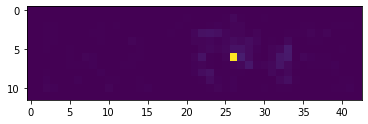

In [9]:
space_bins = bm.space_bin(cs_ts, 20, show_plot = True) #I think this plot is the occupancy plot per bin..?

In [10]:
space_bins

(array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         9.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00,
         0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 2.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
         0.000e+00],
        [0.000e+00, 0.000e+00, 1.000e+00, 2.200e+01, 1.100e+01, 1.200e+01,
         1.700e+01, 1.700e+01, 2.000e+01, 2.000e+00, 1.100e+01, 8.000e+00,
         0.000e+00, 0.000e+00, 3.000e+00, 1.200e+01, 7.000e+00, 9.000e+00,
         2.500e+01, 1.900e+01, 5.500e+01, 1.200e+01, 2.100e+01, 1.700e+01,
         2.000e+01, 4.800e+01, 2.220e+02, 4.500e+01, 0.000e+00, 0.000e+00,
         5.300e+01, 1.400e+01, 1.400e+01, 3.100e+01, 5.000e+00, 2.000e+00,
    

In [11]:
yedge = space_bins[-1][0]
xedge = space_bins[-1][1]

Make df with rows = miniscope frames, columns = each spatial bin, and values = boolean of whether the animal is in each bin at each frame

In [12]:
##replace any nan values for nose position (i think just a dropped position by cleversys) with the previous row's value 
Ynans = cs_ts.loc[pd.isna(cs_ts["NoseY(mm)"]), :].index
Xnans = cs_ts.loc[pd.isna(cs_ts["NoseY(mm)"]), :].index

for i in range(0,len(Ynans)):
    yn_indx = Ynans[i]
    prev_yindx = (yn_indx-1)
    cs_ts.at[yn_indx, "NoseY(mm)"] = cs_ts.at[prev_yindx, "NoseY(mm)"]

for j in range(0,len(Xnans)):
    xn_indx = Xnans[j]
    prev_xindx = (xn_indx-1)
    cs_ts.at[xn_indx, "NoseX(mm)"] = cs_ts.at[prev_xindx, "NoseX(mm)"]
    
    
##determine which x and which y bin the animal is in in each frame (=row of cs_ts): 
yloop_leng = (len(yedge)-1)
xloop_leng = (len(xedge)-1)

ybins = {}
ybin_col = []

xbins = {}
xbin_col = []

for value in cs_ts["NoseY(mm)"]:
    for m in range(0,yloop_leng):
        yledge = yedge[m]
        yredge = yedge[m+1]
        if value >= yledge and value < yredge:
            ybin_col.append(m)
        elif m == (yloop_leng-1) and value == yredge:
            ybin_col.append(yloop_leng-1)

            
#issue 220826: xbin_col is dropping a few rows for some reason -- need to figure out
#220904: restarted kernel and reran code - not dropping rows anymore..?
for value in cs_ts["NoseX(mm)"]:
    for m in range(0,xloop_leng):
        xledge = xedge[m]
        xredge = xedge[m+1]
        if value >= xledge and value < xredge:
            xbin_col.append(m)
        elif m == (xloop_leng-1) and value == xredge:
            xbin_col.append(xloop_leng-1) 

In [13]:
##next, append xbin_col and ybin_col to cs_ts

cs_ts['xbin'] = xbin_col
cs_ts['ybin'] = ybin_col

print(cs_ts) 


       CenterX(mm)  CenterY(mm)  NoseX(mm)  NoseY(mm)  EventRule1  EventRule2  \
0            562.0        234.0      512.0      214.0           0           0   
1            561.0        234.0      512.0      215.0           0           0   
2            561.0        235.0      512.0      214.0           0           0   
3            560.0        236.0      512.0      214.0           0           0   
4            559.0        231.0      512.0      214.0           0           0   
...            ...          ...        ...        ...         ...         ...   
35745        756.0        270.0      814.0      277.0           0           0   
35746        756.0        270.0      815.0      276.0           0           0   
35747        756.0        270.0      815.0      279.0           0           0   
35748        753.0        272.0      816.0      279.0           0           0   
35749        753.0        272.0      816.0      281.0           0           0   

       EventRule3  EventRul

In [14]:
dist = np.asarray(cs_ts["distance_traveled"]) #i believe the units of distance_traveled are mm - just a euclidean distance calculation

time = np.asarray(cs_ts["Time Stamp (ms)"])

#come up with fake timestamp (same step size as to the following timestamp) just before start of real timestamps
prepend_step = time[1] - time[0]
prepend_time = time[0] - prepend_step

time_new = np.insert(time, 0, prepend_time) #prepend fake timestamp to beginning of time array to make calculation of dt same length as rest of data
dTime = np.diff(time_new)

#instantaneous velocity
inst_velo = dist/dTime #mm/ms = m/s
inst_velo


array([0.04159452, 0.02941176, 0.02941176, ..., 0.        , 0.02941176,
       0.        ])

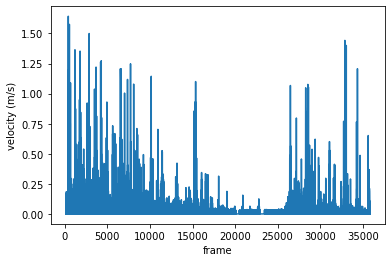

In [15]:
#plot
plt.plot(cs_ts["Frame Number"], inst_velo)
plt.xlabel("frame")
plt.ylabel("velocity (m/s)")
plt.show()

In [16]:
from scipy.ndimage import gaussian_filter1d

#smoothed velocity
#sigma = 2 (somewhat arbitrarily chosen; means velocity is smoothed over five frames (~=50 ms)))
smooth_velo = gaussian_filter1d(inst_velo,2)
smooth_velo

#velocity threshold for filtering - borrowing 10 cm/s = 0.1 m/s from shuman et al 20 (disterhoft uses 12 cm/s, dragoi + tonegawa use 5)
velo_thresh = 0.1
#add boolean column to cs_ts w/ whether that frame passes the velocity threshold or not for later place cell analysis
running = smooth_velo > velo_thresh
running = running.astype(int)


In [17]:
#append velocity values to cs_ts
cs_ts['inst_velo'] = inst_velo
cs_ts['smooth_velo'] = smooth_velo
cs_ts['running'] = running
cs_ts_run = cs_ts[cs_ts['running']==1]
cs_ts

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,original_time,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1,xbin,ybin,inst_velo,smooth_velo,running
0,562.0,234.0,512.0,214.0,0,0,1,0,0,0,...,3.033321,1.414214,115,3868,182,18,3,0.041595,0.040046,0
1,561.0,234.0,512.0,215.0,0,0,1,0,0,0,...,3.049988,1.000000,116,3902,183,18,3,0.029412,0.043336,0
2,561.0,235.0,512.0,214.0,0,0,1,0,0,0,...,3.083321,1.000000,117,3936,185,18,3,0.029412,0.048489,0
3,560.0,236.0,512.0,214.0,0,0,1,0,0,0,...,3.099988,1.414214,118,3967,186,18,3,0.045620,0.051848,0
4,559.0,231.0,512.0,214.0,0,0,1,0,0,0,...,3.133321,6.082763,119,4003,188,18,3,0.168966,0.049157,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35745,756.0,270.0,814.0,277.0,0,0,1,0,1,0,...,941.879566,0.000000,35860,1204060,56513,33,6,0.000000,0.004074,0
35746,756.0,270.0,815.0,276.0,0,0,1,0,1,0,...,941.912899,0.000000,35861,1204092,56515,33,6,0.000000,0.004675,0
35747,756.0,270.0,815.0,279.0,0,0,1,0,1,0,...,941.929566,0.000000,35862,1204126,56516,33,6,0.000000,0.006247,0
35748,753.0,272.0,816.0,279.0,0,0,1,0,1,0,...,941.962899,1.000000,35863,1204160,56518,33,6,0.029412,0.007841,0


In [18]:
cs_ts_run

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,original_time,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1,xbin,ybin,inst_velo,smooth_velo,running
65,576.0,247.0,539.0,241.0,0,0,1,0,0,0,...,4.766648,5.385165,180,6083,285,19,4,0.153862,0.100926,1
241,573.0,246.0,536.0,239.0,0,0,1,0,0,0,...,9.383296,2.000000,356,11989,563,19,4,0.064516,0.118131,1
242,557.0,239.0,564.0,211.0,0,0,1,0,0,0,...,9.416629,15.652476,357,12022,564,20,3,0.474317,0.130693,1
243,561.0,240.0,566.0,210.0,0,0,1,0,0,0,...,9.449962,1.000000,358,12081,567,20,3,0.016949,0.123538,1
244,562.0,240.0,566.0,210.0,0,0,1,0,0,0,...,9.466629,1.000000,359,12096,568,20,3,0.066667,0.102933,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35528,767.0,257.0,806.0,265.0,0,0,1,0,1,0,...,936.179589,4.123106,35643,1196775,56171,32,6,0.124943,0.175975,1
35529,764.0,259.0,797.0,264.0,0,0,1,0,1,0,...,936.212922,6.000000,35644,1196809,56173,32,6,0.176471,0.143474,1
35530,763.0,260.0,794.0,254.0,0,0,1,0,1,0,...,936.229588,1.414214,35645,1196842,56174,32,5,0.042855,0.125006,1
35531,768.0,258.0,809.0,266.0,0,1,0,0,0,0,...,936.262922,2.236068,35646,1196875,56176,32,6,0.067760,0.115472,1


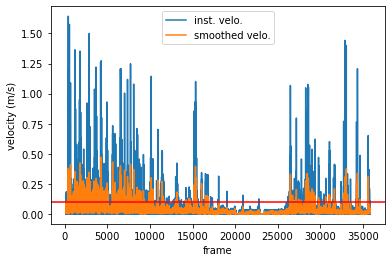

In [19]:
#overlay thresh and smooth velo on plot
plt.plot(cs_ts["Frame Number"], inst_velo, label = "inst. velo.")
plt.plot(cs_ts["Frame Number"], smooth_velo, label = "smoothed velo.")
plt.xlabel("frame")
plt.ylabel("velocity (m/s)")
plt.axhline(y=velo_thresh, color='red')
plt.legend()
plt.show()

In [20]:
#get number of bins produced above
nybins = (len(yedge)-1)
nxbins = (len(xedge)-1)

#create structure with every possible combination of values for x and y bins,
#and order those combinations as all x, then all y (i.e., [0,0], [0,1], [0,2]... [8,0], [8,1]...)

bins_2d = []

xbin_vals = range(len(xedge))
ybin_vals = range(len(yedge))
for n in xbin_vals:
    for m in ybin_vals:
        x = str(xbin_vals[n])
        y = str(ybin_vals[m])
        xy_list = [x,y]
        xy = ','.join(xy_list)
        bins_2d.append(xy)
        
#        bins_2d.append((n,m))




#generate new column of cs_ts called 2D_bin, write for loop going through xbin and ybin columns and 
#assigning value of each row as ([xbin_val, ybin_val]) 
#(in identical format to the array created in previous step of all possible bins)

twod_bins = []

mnop = range(len(xbin_col))
for n in mnop:
    x = str(xbin_col[n])
    y = str(ybin_col[n])
    xy_list = [x,y]
    xy = ','.join(xy_list)
    twod_bins.append(xy)

cs_ts['2D_bin'] = twod_bins
    
#create empty df with columns = the array of all possible bins and rows = miniscope frames
occ_df = pd.DataFrame({"frame":cs_ts["Frame Number"]})
for i in range(len(bins_2d)):
    col_name = bins_2d[i]
    occ_df.loc[:,col_name] = 0

#populate empty df with binaries of what 2D_bin was generated for cs_ts (so value is either 0 or 1)
nrow = range(len(cs_ts))
for i in nrow:
    dd_bin = cs_ts["2D_bin"][i]
    occ_df.loc[i, dd_bin] = 1
    
#occ_df is now the df with the boolean for each spatial bin on a frame-by-frame basis

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  occ_df.loc[:,col_name] = 0
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3661103141.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once 

In [21]:
occ_df

,frame,"0,0","0,1","0,2","0,3","0,4","0,5","0,6","0,7","0,8",...,"43,3","43,4","43,5","43,6","43,7","43,8","43,9","43,10","43,11","43,12"
0,115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,116,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,117,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,118,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,119,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35745,35860,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35746,35861,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35747,35862,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35748,35863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#check correct binning by column, e.g.,
occ_df["33,6"]

0        0
1        0
2        0
3        0
4        0
        ..
35745    1
35746    1
35747    1
35748    1
35749    1
Name: 33,6, Length: 35750, dtype: int64

In [ ]:
#first part (above) - make the boolean for spatial bins -- done through 3 of 220929

#1) define bins
    #doing this based on animal's position. in my experience, animals will touch each wall during their behavior,
    #so i am using their max nose position to define the bounds of the chamber. From cleversys, the x length
    #of the chamber should be identical between sessions (if you set it correctly) but the y length may differ
    #given slight variations in the distortion of the camera
    #plan to use the same number of bins across sessoins, bc we will output the total number of bins the animal went into to
    #get a vague sense of whether the animal fully explored the space or not
    
#2) filter occupancy by a velocity threshold 

#3) frame-by-frame boolean for bin occupancy



#4) place cell (maybe best for a new script) -have not yet started as of 

#also should smooth both neural activity and occupancy by gaussian kernel (same sigma value for both) per disterhoft and shuman

In [ ]:
#second part - per AK, for loading into bento (have not yet started as of 220904)

#"organize your bin "bouts" into a struct with structure bouts.Ch1.(bin_ID) 
# [to] be able to pass that struct to Bento's saveAnnot function to output them in a .annot format 
# that could automatically be loaded into Bento

In case you want to analyze outside of Bento: slicing out the miniscope frames during partner/novel social interaction (xreference to your minian .mat file for analysis)

Import neural data:

In [23]:
import scipy.io

#loading the .csvs output by the minian_to_bento.m script - data is already transposed and I find this format easier than the xArray format directly from minian
datapath = "\\\\penc8.rc.int.colorado.edu\\DonaldsonLab\\Sheeran\\miniscope_files\\analyzed\\5001\\2022_08_31-seperate-trials\\miniscope_compiled"

Cdatapath = os.path.join(datapath, "Cdata.csv")
Sdatapath = os.path.join(datapath, "Sdata.csv")

Cdatapath

#rows = cells; columns = miniscope frames
Cdata = pd.read_csv(Cdatapath, header=None)
Sdata = pd.read_csv(Sdatapath, header=None)

In [24]:
Cdata

,0,1,2,3,4,5,6,7,8,9,...,35878,35879,35880,35881,35882,35883,35884,35885,35886,35887
0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.319561e-03,1.306536e-03,1.293639e-03,1.280869e-03,1.268226e-03,1.255707e-03,1.243312e-03,1.231039e-03,1.218888e-03,1.206856e-03
1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.348931e-07,3.244520e-07,3.143365e-07,3.045363e-07,2.950417e-07,2.858431e-07,2.769314e-07,2.682974e-07,2.599327e-07,2.518288e-07
2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.664255e-01,5.627495e-01,5.590974e-01,5.554689e-01,5.518640e-01,5.482825e-01,5.447242e-01,5.411891e-01,5.376768e-01,5.341874e-01
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.109553e+00,1.088083e+00,1.067028e+00,1.046380e+00,1.026132e+00,1.006276e+00,9.868043e-01,9.677091e-01,9.489835e-01,9.306203e-01
4,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
114,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.260067e+00,1.246732e+00,1.233538e+00,1.220484e+00,1.207568e+00,1.194789e+00,1.182144e+00,1.169634e+00,1.157256e+00,1.145009e+00
115,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.954860e-01,7.872432e-01,7.790858e-01,7.710129e-01,7.630237e-01,7.551172e-01,7.472927e-01,7.395493e-01,7.318861e-01,7.243023e-01
116,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.150299e-04,2.118706e-04,2.087576e-04,2.056904e-04,2.026683e-04,1.996906e-04,1.967566e-04,1.938658e-04,1.910174e-04,1.882108e-04


In [ ]:
#slice out the miniscope frames during which the test animal was interacting with either the novel or partner animal

interact_frames = cs_ts[['Frame Number','huddle_novel',
                         'huddle_partner',
                         'novel_dist_less_10cm',
                         'partner_dist_less_10cm',
                         'distance_to_novel',
                         'distance_to_partner']]

interact_frames

nhuddle_frames = interact_frames[interact_frames['huddle_novel']==1]
nhuddle_frames = nhuddle_frames[['Frame Number', 'huddle_novel']]

phuddle_frames = interact_frames[interact_frames['huddle_partner']==1]
phuddle_frames = phuddle_frames[['Frame Number', 'huddle_partner']]

ninteract_frames = interact_frames[interact_frames['novel_dist_less_10cm']==1]
ninteract_frames = ninteract_frames[['Frame Number', 'novel_dist_less_10cm']]

pinteract_frames = interact_frames[interact_frames['partner_dist_less_10cm']==1]
pinteract_frames = pinteract_frames[['Frame Number', 'partner_dist_less_10cm']]

In [180]:
rates_df = pd.DataFrame()

xBins = cs_ts_run['xbin'].to_numpy()
xBins = list(dict.fromkeys(xBins)) #remove duplicate values
xBins = sorted(xBins) #put bins in order

yBins = cs_ts_run['ybin'].to_numpy()
yBins = list(dict.fromkeys(yBins)) #remove duplicate values
yBins = sorted(yBins) #put bins in order

In [181]:
#for loop to create the Ca2+ event rate for each cell for each spatial bin

for i in xBins:
    x = xBins[i]
    for j in yBins:
        y = yBins[j]
        #get this iteration's bin
        run_bin = cs_ts_run[(cs_ts_run['xbin']==x)&(cs_ts_run['ybin']==y)]
        
        if run_bin.empty: #accounting for fact that animal may not have gone to all possible bins
            pass
        else:
            #retrieve the frames during which animal was running through the bin
            binned_frames = run_bin['Frame Number'].to_numpy()
            binned_frames = binned_frames - 1 #account for 0-indexing in python #WMS note-to-self - think through whether this is necessary or not (here and elsewhere)
            
            #spatially bin the calcium events (CaSB = 'Ca2+, spatially binned')
            CaSB = Sdata.loc[:, binned_frames]
            
            #calculate event rate (events per frame) for all cells for this spatial bin
            cols = CaSB.columns
            nframe = len(cols)
            CaSB['n_events'] = CaSB[cols].gt(0).sum(axis=1)
            CaSB['rate'] = CaSB['n_events']/nframe
            
            #add new column containing event rate for this iteration's spatial bin to CaSB df
            col_name = str(x) + ',' + str(y)
            rates_df[col_name] = CaSB["rate"]
            

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rates_df[col_name] = CaSB["rate"]
C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\3079865377.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all co

In [139]:
CaSB[CaSB['rate']>0]

,681,683,n_events,rate
16,0.000000,0.068599,1,0.5
28,0.000000,0.225370,1,0.5
73,0.026920,0.048418,2,1.0
81,0.063442,0.109375,2,1.0
97,0.133082,0.000000,1,0.5
100,0.106083,0.137905,2,1.0
101,0.130215,0.183245,2,1.0
110,0.007249,0.042829,2,1.0
111,0.120595,0.141891,2,1.0


In [190]:
rates_df

,"0,9","0,10","1,9","1,10","2,3","2,5","2,6","2,7","2,8","2,9",...,"40,10","41,2","41,6","41,7","41,8","41,9","41,10","42,9","42,10","42,11"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.333333,0.0,0.4,0.133333,0.1875,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.193548,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0,0.000000,...,0.066667,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0


In [182]:
col_name

'42,11'

In [187]:
rates_df['2,5']

0      0.0
1      0.0
2      0.0
3      0.5
4      0.0
      ... 
113    0.0
114    0.0
115    0.0
116    0.0
117    0.0
Name: 2,5, Length: 118, dtype: float64

In [178]:
CaSB

,6675,6676,n_events,rate
0,0,0,0,0.0
1,0,0,0,0.0
2,0,0,0,0.0
3,0,0,0,0.0
4,0,0,0,0.0
...,...,...,...,...
113,0,0,0,0.0
114,0,0,0,0.0
115,0,0,0,0.0
116,0,0,0,0.0


In [195]:
cs_ts_run['space_bin'] = cs_ts_run['xbin'].astype(str) + ',' + cs_ts_run['ybin'].astype(str)

C:\Users\sheer\AppData\Local\Temp\ipykernel_28296\1537689356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_ts_run['space_bin'] = cs_ts_run['xbin'].astype(str) + ',' + cs_ts_run['ybin'].astype(str)


In [196]:
cs_ts_run

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1,xbin,ybin,inst_velo,smooth_velo,running,space_bin
65,576.0,247.0,539.0,241.0,0,0,1,0,0,0,...,5.385165,180,6083,285,19,4,0.153862,0.100926,1,"19,4"
241,573.0,246.0,536.0,239.0,0,0,1,0,0,0,...,2.000000,356,11989,563,19,4,0.064516,0.118131,1,"19,4"
242,557.0,239.0,564.0,211.0,0,0,1,0,0,0,...,15.652476,357,12022,564,20,3,0.474317,0.130693,1,"20,3"
243,561.0,240.0,566.0,210.0,0,0,1,0,0,0,...,1.000000,358,12081,567,20,3,0.016949,0.123538,1,"20,3"
244,562.0,240.0,566.0,210.0,0,0,1,0,0,0,...,1.000000,359,12096,568,20,3,0.066667,0.102933,1,"20,3"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35528,767.0,257.0,806.0,265.0,0,0,1,0,1,0,...,4.123106,35643,1196775,56171,32,6,0.124943,0.175975,1,"32,6"
35529,764.0,259.0,797.0,264.0,0,0,1,0,1,0,...,6.000000,35644,1196809,56173,32,6,0.176471,0.143474,1,"32,6"
35530,763.0,260.0,794.0,254.0,0,0,1,0,1,0,...,1.414214,35645,1196842,56174,32,5,0.042855,0.125006,1,"32,5"
35531,768.0,258.0,809.0,266.0,0,1,0,0,0,0,...,2.236068,35646,1196875,56176,32,6,0.067760,0.115472,1,"32,6"


In [188]:
allBins = list(rates_df.columns)

In [189]:
allBins

['0,9',
 '0,10',
 '1,9',
 '1,10',
 '2,3',
 '2,5',
 '2,6',
 '2,7',
 '2,8',
 '2,9',
 '2,10',
 '2,11',
 '3,1',
 '3,2',
 '3,3',
 '3,4',
 '3,5',
 '3,6',
 '3,7',
 '3,8',
 '3,9',
 '3,10',
 '3,11',
 '4,1',
 '4,2',
 '4,4',
 '4,5',
 '4,6',
 '4,7',
 '4,8',
 '4,9',
 '4,10',
 '5,1',
 '5,2',
 '5,4',
 '5,5',
 '5,6',
 '5,7',
 '5,8',
 '5,9',
 '5,10',
 '6,0',
 '6,1',
 '6,2',
 '6,3',
 '6,4',
 '6,5',
 '6,6',
 '6,7',
 '6,8',
 '6,9',
 '6,10',
 '7,2',
 '7,3',
 '7,4',
 '7,6',
 '7,7',
 '7,8',
 '7,9',
 '7,10',
 '8,2',
 '8,3',
 '8,4',
 '8,6',
 '8,7',
 '8,8',
 '8,9',
 '9,2',
 '9,3',
 '9,4',
 '9,5',
 '9,6',
 '9,7',
 '9,8',
 '9,9',
 '9,10',
 '10,1',
 '10,2',
 '10,3',
 '10,5',
 '10,6',
 '10,7',
 '10,8',
 '10,9',
 '10,10',
 '11,2',
 '11,3',
 '11,4',
 '11,5',
 '11,6',
 '11,7',
 '11,8',
 '11,9',
 '12,3',
 '12,4',
 '12,5',
 '12,6',
 '12,7',
 '13,3',
 '13,4',
 '13,5',
 '13,6',
 '13,7',
 '14,3',
 '14,4',
 '14,5',
 '14,6',
 '14,7',
 '14,8',
 '14,9',
 '15,3',
 '15,4',
 '15,5',
 '15,6',
 '15,7',
 '15,8',
 '15,9',
 '15,10',
 

In [202]:
frames_bin

,CenterX(mm),CenterY(mm),NoseX(mm),NoseY(mm),EventRule1,EventRule2,EventRule3,EventRule7,EventRule8,EventRule9,...,distance_traveled,Frame Number,Time Stamp (ms),Frame Number_cam1,xbin,ybin,inst_velo,smooth_velo,running,space_bin
65,576.0,247.0,539.0,241.0,0,0,1,0,0,0,...,5.385165,180,6083,285,19,4,0.153862,0.100926,1,"19,4"
241,573.0,246.0,536.0,239.0,0,0,1,0,0,0,...,2.000000,356,11989,563,19,4,0.064516,0.118131,1,"19,4"
294,566.0,246.0,532.0,239.0,0,0,1,0,0,0,...,46.010868,409,13768,646,19,4,1.643245,0.380129,1,"19,4"
2056,479.0,259.0,535.0,231.0,0,0,1,0,0,0,...,7.071068,2171,72928,3423,19,4,0.207973,0.217319,1,"19,4"
3295,482.0,256.0,545.0,236.0,0,0,1,0,0,0,...,8.944272,3410,114531,5376,19,4,0.235376,0.215713,1,"19,4"
3296,489.0,252.0,550.0,235.0,0,0,1,0,0,0,...,8.062258,3411,114560,5377,19,4,0.278009,0.221546,1,"19,4"
4262,484.0,241.0,545.0,233.0,0,0,1,0,0,0,...,4.123106,4377,146992,6899,19,4,0.121268,0.132336,1,"19,4"
6144,480.0,259.0,535.0,239.0,0,0,1,0,0,0,...,5.385165,6259,210179,9865,19,4,0.163187,0.136656,1,"19,4"
6145,489.0,256.0,545.0,233.0,0,0,1,0,0,0,...,5.099020,6260,210212,9867,19,4,0.154516,0.140042,1,"19,4"


information content (using formula in shuman et al 20 Nat. Neuro. ->Methods->Linear track analysis):

keeping all time in unit of frames for simplicity

t_i = time animal occupies i-th bin (with running threshold applied)

sum_t = total time spent in all bins (=total time of recording)


In [213]:
allBins #all the bins the animal visits, defined above

['0,9',
 '0,10',
 '1,9',
 '1,10',
 '2,3',
 '2,5',
 '2,6',
 '2,7',
 '2,8',
 '2,9',
 '2,10',
 '2,11',
 '3,1',
 '3,2',
 '3,3',
 '3,4',
 '3,5',
 '3,6',
 '3,7',
 '3,8',
 '3,9',
 '3,10',
 '3,11',
 '4,1',
 '4,2',
 '4,4',
 '4,5',
 '4,6',
 '4,7',
 '4,8',
 '4,9',
 '4,10',
 '5,1',
 '5,2',
 '5,4',
 '5,5',
 '5,6',
 '5,7',
 '5,8',
 '5,9',
 '5,10',
 '6,0',
 '6,1',
 '6,2',
 '6,3',
 '6,4',
 '6,5',
 '6,6',
 '6,7',
 '6,8',
 '6,9',
 '6,10',
 '7,2',
 '7,3',
 '7,4',
 '7,6',
 '7,7',
 '7,8',
 '7,9',
 '7,10',
 '8,2',
 '8,3',
 '8,4',
 '8,6',
 '8,7',
 '8,8',
 '8,9',
 '9,2',
 '9,3',
 '9,4',
 '9,5',
 '9,6',
 '9,7',
 '9,8',
 '9,9',
 '9,10',
 '10,1',
 '10,2',
 '10,3',
 '10,5',
 '10,6',
 '10,7',
 '10,8',
 '10,9',
 '10,10',
 '11,2',
 '11,3',
 '11,4',
 '11,5',
 '11,6',
 '11,7',
 '11,8',
 '11,9',
 '12,3',
 '12,4',
 '12,5',
 '12,6',
 '12,7',
 '13,3',
 '13,4',
 '13,5',
 '13,6',
 '13,7',
 '14,3',
 '14,4',
 '14,5',
 '14,6',
 '14,7',
 '14,8',
 '14,9',
 '15,3',
 '15,4',
 '15,5',
 '15,6',
 '15,7',
 '15,8',
 '15,9',
 '15,10',
 

In [214]:
allBins[4]

'2,3'

In [215]:
rates_df

,"0,9","0,10","1,9","1,10","2,3","2,5","2,6","2,7","2,8","2,9",...,"40,10","41,2","41,6","41,7","41,8","41,9","41,10","42,9","42,10","42,11"
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.333333,0.0,0.4,0.133333,0.1875,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.193548,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.2,0.5,0.0,0.0,0.0,0.000000,...,0.066667,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0
116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0,0.0,0.0


In [216]:
xB = 19
yB = 4

bin_name = str(xB) + ',' + str(yB)

In [226]:
rates_df[bin_name][8]

0.1111111111111111

In [239]:
sum_t = len(cs_ts_run)

#this is all for a single neuron
#should create for loop to do this for each neuron

##cell_id = row

#creating (p_i * lambda_i)
#need to iterate over all possible t_is

#should make this a for loop where n = neuron # (should be row number for rates_df)
n = 0

list_to_sum = []

for k in allBins:
    frames_bin = cs_ts_run[cs_ts_run['space_bin'] == k]
    
    t_i = len(frames_bin.index) #number of frames where space_bin = 'xB,yB' defined by iteration of allBins
    
    p_i = t_i/sum_t
    
    lambda_i = rates_df[k][n]
    
    value = p_i * lambda_i
    
    list_to_sum.append(value)
    
    #multiple p_i and lambda_i, add iteratively to numpy array
    
#once for loop has included all the p_i*lambda_is into the array, sum them together to get lambda_line
    
    


#adjust frames_bin to account for new list in cell above
#frames_bin = cs_ts_run[cs_ts_run['space_bin'] == bin_name]
#        
#        t_i = len(frames_bin.index) #number of frames where space_bin = 'xB,yB'
#        
#        p_i = t_i/sum_t#


In [243]:
list_to_sum = np.asarray(list_to_sum)
lambda_line = np.sum(list_to_sum)
lambda_line

0.017952127659574466

place cells (modified from Shuman et al., 2020, Wirtshafter and Disterhoft, 2022, Kinsky et al., 2018):

In [ ]:
#to find place cells:
#first: find spatial bins of both animal's position and temporal neural data
#---done

#second: smooth spatial activity and occupancy by gaussian kernel (5 cm for Shuman, 2 cm for wirtshafter, both 2cm spatial bins, 2.5 cm kernel for kinksy, 1 cm wide bins)) 
#---WMS still needs to do

#third: divide binned neural activity by binned occupancy to calculate spatial activity rate (Shuman)
#---done

#fourth: calculate mutual information for each cell (see equations)
#---WMS still needs to do

#STATUS AS OF 221005 - using shuman et al 20 equation (see notebook for breakdown of eq) 
#- have gotten as far as calculating p_i, lambda_i, and lambda-line (above, should read-thru and check to make sure ok)
#- need to now create I (=information content)
#- also need to make this all iterate over all neurons



#fifth: shuffle calcium event timestamps, calculate new SI (do this 1000 times)

#sixth: find cells whose SIs exceed 95% of shuffled SIs

#seventh: locate each place cell's place field and plot (both spatial plot and tiling plot)



#should think about what a 'spike' means in the minian dataset - look at shuman et al methods section for thought



#definition of a place cell in calcium imaging studies:
#1) mutual information (or information content) must be above chance for a circularly permutated dataset (shuffled 500-1000 times)
#2) (differing opinions in lit): at least 5 transients in session (Kinsky) and/or
    #mean 'firing rate' of at least 0.01 Hz during running (Wirtshafter) and/or
    #within-session stability of neuron('s spatial firing?) is above chance (Shuman) and/or
    #"[the] spatial activity rate map of each neuron has consecutive bins sapnning at least 10 cm w activity rates in at least the 95th percentile" (Shuman)

In [ ]:
##AS OF 10/3/22 - have binned spatial activity and gotten rate for one bin - what is the best way to do this recursively for all bins?
##ideally, want an output table of first column = each cell and every other column = every bin and the rate 

#(want this for each shuffle and for real -- so would iterate this process 1000 times...)
#also need to figure out where to smooth